#### 图片基础处理

In [20]:
import cv2#opencv读取的格式是BGR
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = cv2.imread('cat.png')#图像的读取

In [21]:
img

array([[[125, 127, 129],
        [140, 142, 144],
        [146, 152, 158],
        ...,
        [151, 155, 157],
        [149, 154, 155],
        [153, 155, 157]],

       [[ 67,  70,  75],
        [116, 119, 124],
        [109, 116, 125],
        ...,
        [165, 173, 179],
        [163, 170, 176],
        [162, 168, 174]],

       [[ 89,  93,  97],
        [109, 112, 116],
        [107, 114, 122],
        ...,
        [166, 174, 180],
        [167, 175, 181],
        [164, 169, 175]],

       ...,

       [[ 82,  95, 106],
        [127, 141, 151],
        [154, 172, 184],
        ...,
        [152, 162, 168],
        [175, 185, 191],
        [198, 208, 214]],

       [[170, 184, 194],
        [173, 186, 196],
        [150, 168, 180],
        ...,
        [197, 207, 213],
        [193, 203, 209],
        [194, 204, 210]],

       [[133, 147, 157],
        [153, 166, 177],
        [151, 169, 181],
        ...,
        [190, 200, 206],
        [175, 185, 191],
        [131, 142, 147]]

In [22]:
cv2.imshow('image',img)
cv2.waitKey(5000)#图片展示的时间长度，单位ms
cv2.destroyAllWindows()#当等待时间为0时，键盘反馈关闭窗口。不为0时到时间自动关闭窗口。

In [23]:
def cv_show(name,img):
    cv2.imshow('image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [24]:
cv_show('image',img)

In [40]:
img.shape#输出结果为：（h,w,c），也就是（高度，宽度，维度<BGR>）

(413, 499, 3)

In [7]:
img = cv2.imread('cat.png',cv2.IMREAD_GRAYSCALE)#对图片进行灰度处理
# img

In [6]:
img.shape

(413, 499)

In [43]:
cv_show('image',img)

In [44]:
cv2.imwrite('cat_gray.png',img)#图片保存

True

#### 视频处理

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
vc = cv2.VideoCapture('test_video.mp4')
# vc.release()
# cv2.destroyAllWindows()

In [9]:
if vc.isOpened():
    open, frame = vc.read()
else:
    open = False
# frame.shape
# frame = cv2.resize(frame,(270,480))检测截取图片大小并调整以适应电脑屏幕播放

In [10]:
while open:
    ret, frame = vc.read()#ret：是否读到了一帧图片（True or False）  frame：具体图片
    if frame is None:
        print('Something wrong with the video.')
        break
    if ret == True:
#         cv2.imshow('frame',frame)
        frame = cv2.resize(frame,(1320,810))
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)#记忆：BGR to GRAY
        cv2.imshow('result', gray)
        if cv2.waitKey(15) & 0xFF == 27:#括号中为帧间隔
            break
vc.release()
cv2.destroyAllWindows()

In [8]:
import cv2
def cv_show(name, img):
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()#再次定义cv_show函数
img = cv2.imread('cat.png')
cat = img[0:200,0:200]
cv_show('ROI cat', cat)#Region Of Interest 感兴趣的区域（截图）

#### 颜色通道提取

In [9]:
b,g,r = cv2.split(img)

In [10]:
b

array([[125, 140, 146, ..., 151, 149, 153],
       [ 67, 116, 109, ..., 165, 163, 162],
       [ 89, 109, 107, ..., 166, 167, 164],
       ...,
       [ 82, 127, 154, ..., 152, 175, 198],
       [170, 173, 150, ..., 197, 193, 194],
       [133, 153, 151, ..., 190, 175, 131]], dtype=uint8)

In [11]:
b.shape

(413, 499)

In [37]:
img = cv2.merge((b,g,r))#颜色通道组合
# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
img.shape

(413, 499, 3)

In [25]:
cur_img = img.copy()#深拷贝原图片
cur_img[:,:,0] = 0#B通道赋值0
cur_img[:,:,1] = 0#G通道赋值0
cv_show('R',cur_img)

#### 边界填充

In [119]:
top_size,bottom_size,left_size,right_size = [50,50,50,50]

img = cv2.imread('cat.png', cv2.IMREAD_GRAYSCALE)
# img = cv2.resize(img,(300,450))
img.shape
replicate = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_REPLICATE)#复制法，利用最边缘像素复制填充
reflect = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_REFLECT)#镜像法，edcba|abcdefgh|hgfed
reflect_101 = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_REFLECT_101)#镜像法改，fedcb|abcdefgh|gfedc
wrap = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_WRAP)#外包装法defgh|abcdefgh|abcde
constant = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_CONSTANT,value = 0)#赋值法，边缘赋颜色值，需要指出value = ()
cv_show('img1', reflect_101)

#### 数值计算

In [11]:
img_cat = cv2.imread('cat.png')
img_dog = cv2.imread('dog.png')

In [12]:
img_cat2 = img_cat + 10
img_cat[:5,:,0]#前5行，所有列，0通道

array([[125, 140, 146, ..., 151, 149, 153],
       [ 67, 116, 109, ..., 165, 163, 162],
       [ 89, 109, 107, ..., 166, 167, 164],
       [120, 151, 159, ..., 166, 164, 166],
       [140, 175, 171, ..., 166, 164, 167]], dtype=uint8)

In [13]:
img_cat2[:5,:,0]#超出256的部分除256取余

array([[135, 150, 156, ..., 161, 159, 163],
       [ 77, 126, 119, ..., 175, 173, 172],
       [ 99, 119, 117, ..., 176, 177, 174],
       [130, 161, 169, ..., 176, 174, 176],
       [150, 185, 181, ..., 176, 174, 177]], dtype=uint8)

In [14]:
(img_cat + img_cat2)[:5,:,0]#超出256的部分除256取余

array([[  4,  34,  46, ...,  56,  52,  60],
       [144, 242, 228, ...,  84,  80,  78],
       [188, 228, 224, ...,  86,  88,  82],
       [250,  56,  72, ...,  86,  82,  86],
       [ 34, 104,  96, ...,  86,  82,  88]], dtype=uint8)

In [15]:
cv2.add(img_cat,img_cat2)[:5,:,0]#超出255的部分直接取255

array([[255, 255, 255, ..., 255, 255, 255],
       [144, 242, 228, ..., 255, 255, 255],
       [188, 228, 224, ..., 255, 255, 255],
       [250, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [16]:
img_cat + img_dog

ValueError: operands could not be broadcast together with shapes (413,499,3) (417,488,3) 

In [17]:
img_dog = cv2.resize(img_dog,(499,413))#简单的换形函数
cv_show('image_1',img_dog)
cv_show('image_2',img_cat)
img_dog.shape
(img_cat + img_dog)[:5,:,0]

array([[ 40,  66,  58, ...,  91,  91,  95],
       [245,  49,  29, ..., 105, 104, 102],
       [ 17,  45,  35, ..., 103, 105, 101],
       [ 48,  87,  91, ..., 100,  99, 101],
       [ 61, 111, 103, ..., 100,  99, 101]], dtype=uint8)

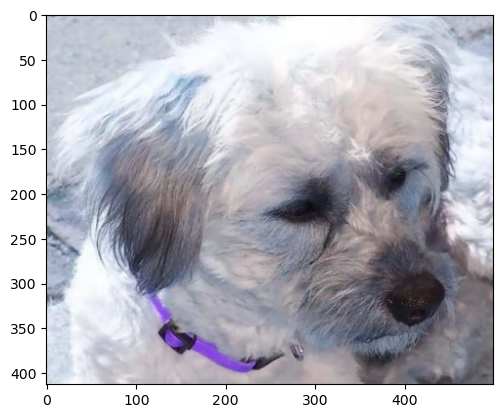

In [18]:
res = cv2.resize(img_dog,(0,0),fx=1,fy=1)#倍数换形函数
plt.imshow(res)
cv_show('img',img_dog)

#### 图层叠加

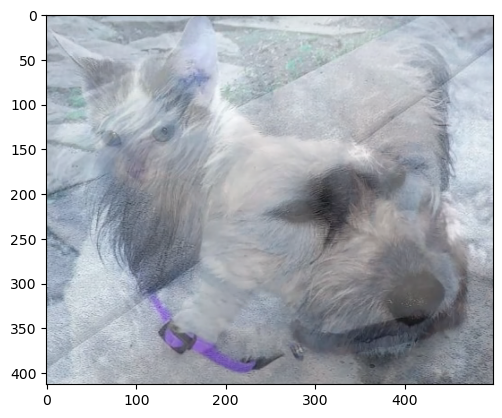

In [19]:
res = cv2.addWeighted(img_cat,0.4,img_dog,0.6,0)#(img_a,虚化倍数,img_b,虚化倍数,提亮权重)，R=αA+βB+C
cv_show('img',res)
plt.imshow(res)

#### 图像阈值 
ret , dst = cv2.threshold(src , thresh , maxval , type)<灰度图像 ，最低阈值 ， 最高阈值 ， 二值化处理类型>

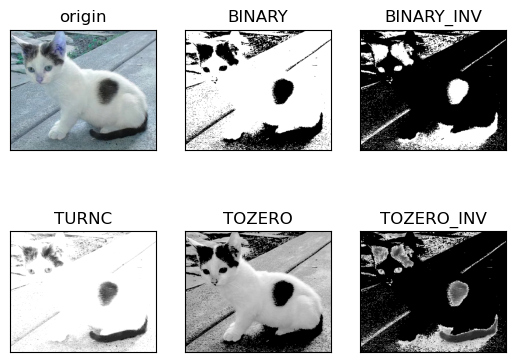

(413, 499, 3)

In [7]:
# cv2.THRESH_BINARY    超过阈值部分取最大值（maxval），否则取0
# cv2.THRESH_BINARY_INV小于阈值部分取最大值（maxval），否则取0
# cv2.THRESH_TRUNC     大于阈值部分取截断值（thresh），其余不变
# cv2.THRESH_TOZERO    大于阈值部分不改变，否则取0
# cv2.THRESH_TOZERO_INV小于阈值部分不改变，否则取0
import cv2
import numpy as mp
import matplotlib.pyplot as plt


def cv_show(name,img):
    cv2.imshow('image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

# img_gray = cv2.imread('cat_png',cv2.IMREAD_GRAYSCALE)
# cv_show('image',img_gray)
img = cv2.imread('cat.png')
img_gray = cv2.imread('cat.png',cv2.IMREAD_GRAYSCALE)
cv_show('12',img_gray)


ret , draft_1 = cv2.threshold(img_gray , 127 , 256 , cv2.THRESH_BINARY)
ret , draft_2 = cv2.threshold(img_gray , 127 , 256 , cv2.THRESH_BINARY_INV)
ret , draft_3 = cv2.threshold(img_gray , 127 , 256 , cv2.THRESH_TRUNC)
ret , draft_4 = cv2.threshold(img_gray , 127 , 256 , cv2.THRESH_TOZERO)
ret , draft_5 = cv2.threshold(img_gray , 127 , 256 , cv2.THRESH_TOZERO_INV)


titles = ['origin' , 'BINARY' , 'BINARY_INV' , 'TURNC' , 'TOZERO' , 'TOZERO_INV']
images = [img , draft_1 , draft_2 , draft_3 , draft_4 , draft_5]

for i in range(6):
    plt.subplot(2 , 3 , i+1) , plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]) , plt.yticks([])
plt.show()
img.shape

#### 图像平滑处理

In [33]:
img = cv2.imread('lenanoise.png')
cv_show('12',img)

##### 均值滤波：简单的平均卷积操作

In [30]:
img = cv2.imread('lenanoise.png')
cv_show('12',img)

In [40]:
lenanoise_blur = cv2.blur(img,(3,3))
cv_show('12',lenanoise_blur)
titles = ['origin' , 'blur']
images = [img , lenanoise_blur]

# for i in range(2):
#     plt.subplot(2 , 3 , i+1) , plt.imshow(images[i])
#     plt.title(titles[i])
#     plt.xticks([]) , plt.yticks([])
# plt.show()

##### 方框滤波：基本和均值一样，但可以选择归一化

In [54]:
# -1：得到的结果和输入图片的颜色通道数一致
# normalize = True/False : 是否做归一化。做归一化结果和均值滤波相同。
# **归一化**
lenanoise_box_1 = cv2.boxFilter(img , -1 , (3 , 3) , normalize = True)
cv_show('12',lenanoise_box_1)

In [55]:
# **不归一化**
# 大于255的越界值均取255
lenanoise_box_2 = cv2.boxFilter(img , -1 , (3 , 3) , normalize = False)
cv_show('12',lenanoise_box_2)

##### 高斯滤波：按统计学中的高斯分布函数对离中心点远近不同的像素点进行加权平均处理

In [48]:
lenanoise_gaussian = cv2.GaussianBlur(img , (5 ,5) , 1)
cv_show('12' , lenanoise_gaussian)

##### 中值滤波：取矩阵中所有值按大小排序后的中值为平滑处理结果

In [53]:
lenanoise_median = cv2.medianBlur(img , 5)
cv_show('12' , lenanoise_median)

##### 均值|高斯|中值比较

In [63]:
import numpy as np
res = np.hstack((lenanoise_blur , lenanoise_gaussian , lenanoise_median))
cv2.imshow('blur|gaussian|median' , res)
cv2.waitKey(0)
cv2.destroyAllWindows()